<a href="https://colab.research.google.com/github/GustavoHFMO/GrupoSerDisciplinas/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código adaptado de: https://datafai.com/2018/02/25/deep-learning-convolution-neural-network-cnn-in-python/

In [25]:
# importando as bibliotecas
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
import keras

In [26]:
# definindo uma semente para poder replicar os resulados
np.random.seed(30)

In [27]:
# importando o dataset a ser utilizado e dividindo ele em treino e teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()

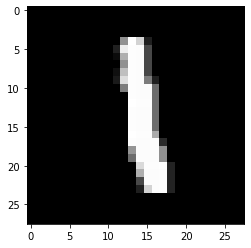

In [28]:
# mostrando o formato do conjunto dos dados
from matplotlib import pyplot as plt
plt.imshow(x_train[6], cmap='gray')
plt.show()

In [29]:
# ajustando o formato dos dados para serem compativeis com a CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [30]:
# realizando a noramalização dos dados, para que fiquem no intervalo de [0, 1]
x_train = x_train/255
x_test = x_test/255

In [31]:
# convertendo os labels que estavam em formato de string para numeros 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [32]:
# inicializando o modelo de CNN e definindo a sua estrutura
model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3),
          activation='relu',
          input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [33]:
# compilando o modelo, para isso definimos a função de custo, o algoritmo de otimização e a métrica de validação
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# treinando o modelo com os dados de treinamento e validando com os de teste
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=15, 
          batch_size=100, 
          verbose=2)

Epoch 1/15
600/600 - 21s - loss: 0.3319 - accuracy: 0.8984 - val_loss: 0.0961 - val_accuracy: 0.9697
Epoch 2/15
600/600 - 21s - loss: 0.1371 - accuracy: 0.9595 - val_loss: 0.0604 - val_accuracy: 0.9791
Epoch 3/15
600/600 - 21s - loss: 0.1032 - accuracy: 0.9687 - val_loss: 0.0515 - val_accuracy: 0.9822
Epoch 4/15
600/600 - 21s - loss: 0.0846 - accuracy: 0.9746 - val_loss: 0.0470 - val_accuracy: 0.9837
Epoch 5/15
600/600 - 21s - loss: 0.0787 - accuracy: 0.9757 - val_loss: 0.0425 - val_accuracy: 0.9850
Epoch 6/15
600/600 - 21s - loss: 0.0672 - accuracy: 0.9791 - val_loss: 0.0391 - val_accuracy: 0.9868
Epoch 7/15
600/600 - 21s - loss: 0.0615 - accuracy: 0.9808 - val_loss: 0.0379 - val_accuracy: 0.9874
Epoch 8/15
600/600 - 21s - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0402 - val_accuracy: 0.9873
Epoch 9/15
600/600 - 21s - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0371 - val_accuracy: 0.9883
Epoch 10/15
600/600 - 21s - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0.0349 - val_accura

In [35]:
# calculando o desempenho da rede para o conjunto de teste e mostrando o resultado
Accuracy = model.evaluate(x_test, y_test, verbose=0)
print("CNN Accuracy: ", round(Accuracy[1]*100, 2))

CNN Accuracy:  98.93
